In [1]:
%load_ext autoreload
%autoreload 2
 

In [2]:
import sys
sys.path.insert(0, "../../PopV")
import anndata
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import popv
import importlib

/home/cane/miniconda3/envs/popv_bench/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/cane/miniconda3/envs/popv_bench/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
../../PopV/popv/_settings.py:108: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  scvi.settings.seed = seed
2024-02-15 20:51:03.751345: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
From /home/cane/miniconda3/envs/popv_bench/lib/python3.9/site-packages/tensorflow/python/compat/v2_compat.py:107: dis

In [3]:
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['pdf.use14corefonts'] = True 

In [4]:
DPI = 600

In [5]:
adata = anndata.read('../lung_annotation/annotation/query_and_reference_popv.h5ad')
adata = adata[adata.obs['_dataset']=='query']

In [6]:
adata

View of AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probab

In [7]:
adata

View of AnnData object with n_obs × n_vars = 69650 × 4000
    obs: 'tissue_in_publication', 'donor_id', 'free_annotation', 'compartment', 'cell_type_ontology_term_id', 'cell_type', 'assay', 'sex', 'tissue', 'cell_ontology_class', 'cell_ontology_class_tissue', 'donor_tissue', 'assay_correct', 'donor_assay', '_batch_annotation', '_labels_annotation', '_ref_subsample', 'paper_annotation', 'sample', '_dataset', 'n_counts', 'popv_celltypist_prediction', 'popv_celltypist_prediction_probabilities', 'popv_knn_on_bbknn_prediction', 'popv_knn_on_bbknn_prediction_probabilities', 'popv_knn_on_scanorama_prediction', 'popv_knn_on_scanorama_prediction_probabilities', 'subsampled_labels', '_scvi_batch', '_scvi_labels', 'popv_knn_on_scvi_prediction', 'popv_knn_on_scvi_prediction_probabilities', '_labels_annotation_cell_ontology_id', 'popv_onclass_prediction', 'popv_onclass_seen', 'popv_onclass_prediction_probabilities', 'popv_onclass_seen_probabilities', 'popv_rf_prediction', 'popv_rf_prediction_probab

In [8]:
adata.obs['paper_annotation']

P1_4_TTGGAACTCCGTAGTA                       Macrophage
P1_4_TTGGCAAAGAGGACGG                       Macrophage
P1_4_TTCTTAGAGGATGGTC                       Macrophage
P1_4_TTGGAACAGGGATCTG                       Macrophage
P1_4_TTGCGTCTCAGATAAG                       Macrophage
                                       ...            
K23_B003269.gencode.vH29                Natural Killer
K21_B003269.gencode.vH29                Natural Killer
B4_B002460.gencode.vH29     Alveolar Epithelial Type 2
K19_B003269.gencode.vH29                Natural Killer
G3_B003269.gencode.vH29          Differentiating Basal
Name: paper_annotation, Length: 69650, dtype: category
Categories (59, object): ['Adventitial Fibroblast', 'Airway Smooth Muscle', 'Alveolar Epithelial Type 1', 'Alveolar Epithelial Type 2', ..., 'Signaling Alveolar Epithelial Type 2', 'TREM2+ Dendritic', 'Vascular Smooth Muscle', 'Vein']

In [9]:
from popv.reproducibility import _alluvial

In [10]:
adata.obs["paper_annotation"] = adata.obs["paper_annotation"].astype(str) + ' '

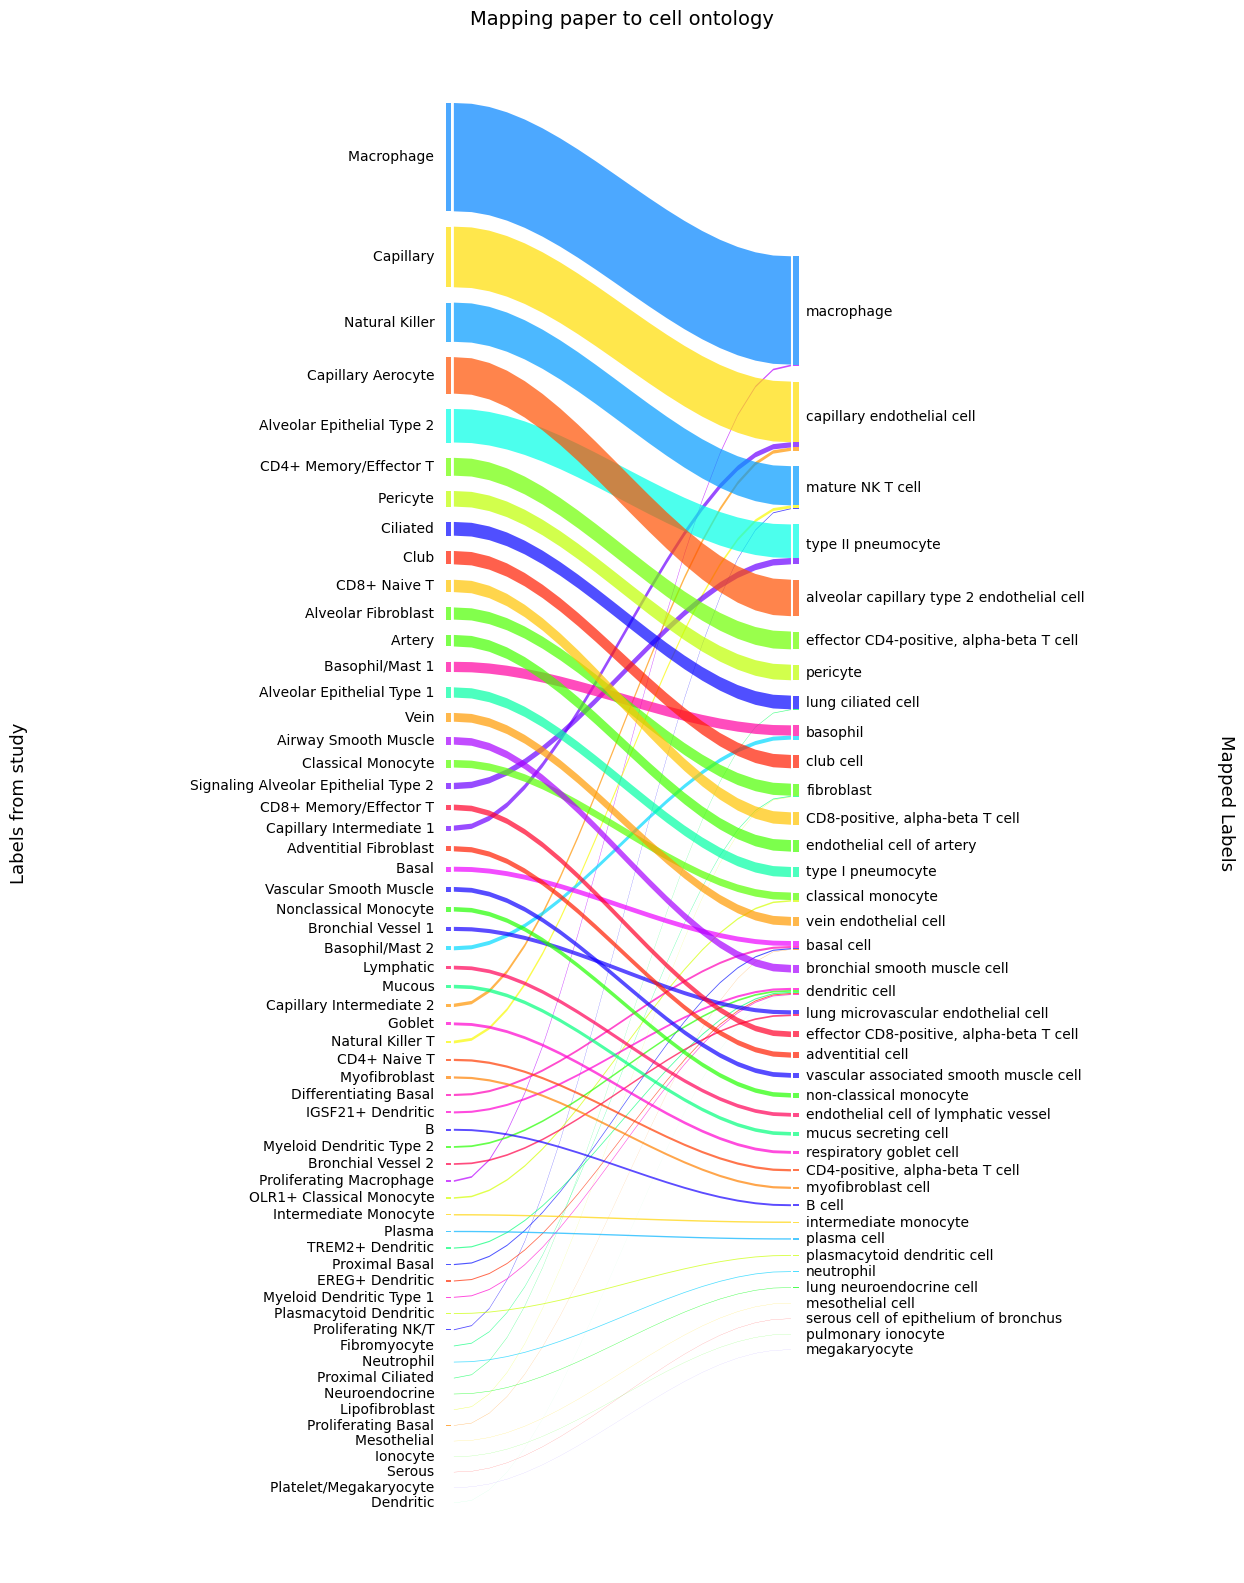

In [25]:
input_data = adata.obs[["paper_annotation", "cell_ontology_class"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Labels from study", "Mapped Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping paper to cell ontology', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig2/fig2_alluvial_study_to_ont_labels.pdf", dpi=DPI, bbox_inches="tight")
plt.show()

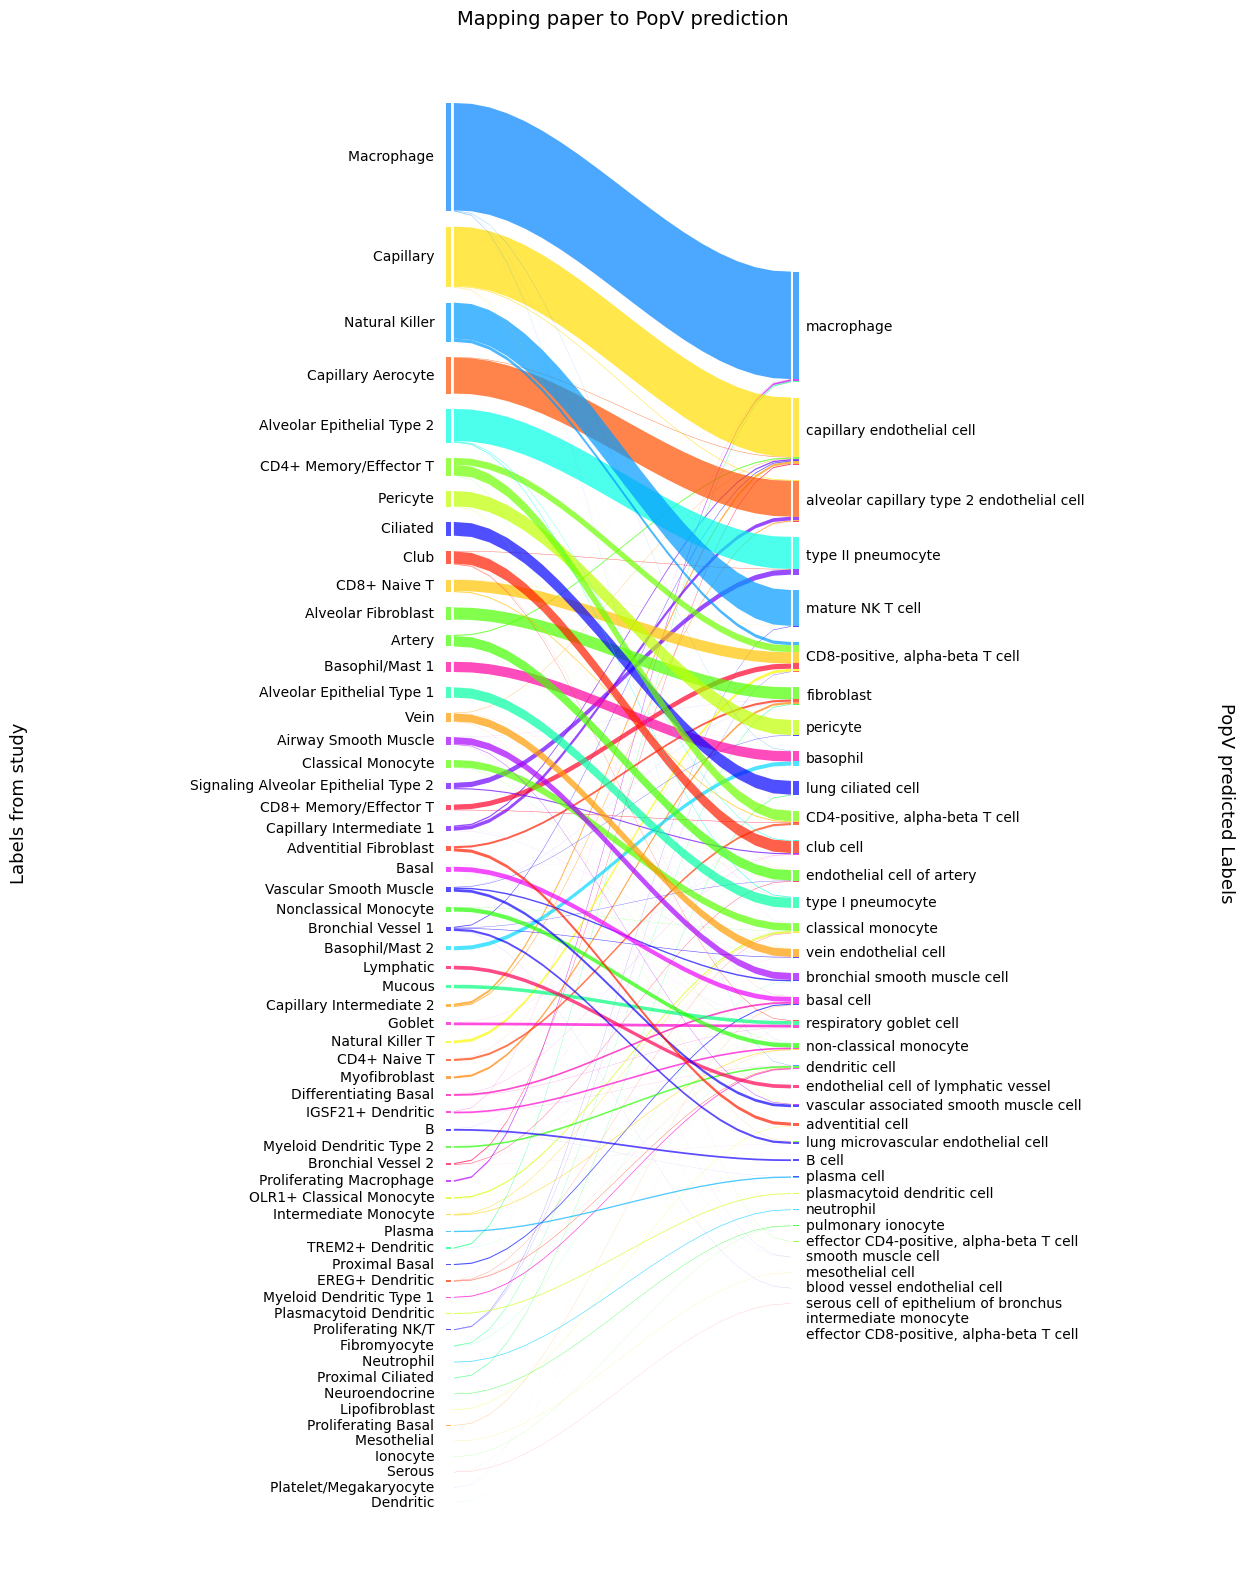

In [27]:
input_data = adata.obs[["paper_annotation", "popv_prediction"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Labels from study", "PopV predicted Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping paper to PopV prediction', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig2/fig2_alluvial_study_to_popv_prediction.pdf", dpi=DPI, bbox_inches="tight")
plt.show()

In [28]:
mismatch_ontology = adata[adata.obs['popv_majority_vote_prediction'] != adata.obs['popv_prediction']].copy()

In [29]:
mismatch_ontology.obs["cell_ontology_class"] = mismatch_ontology.obs["cell_ontology_class"].astype(str) + ' '

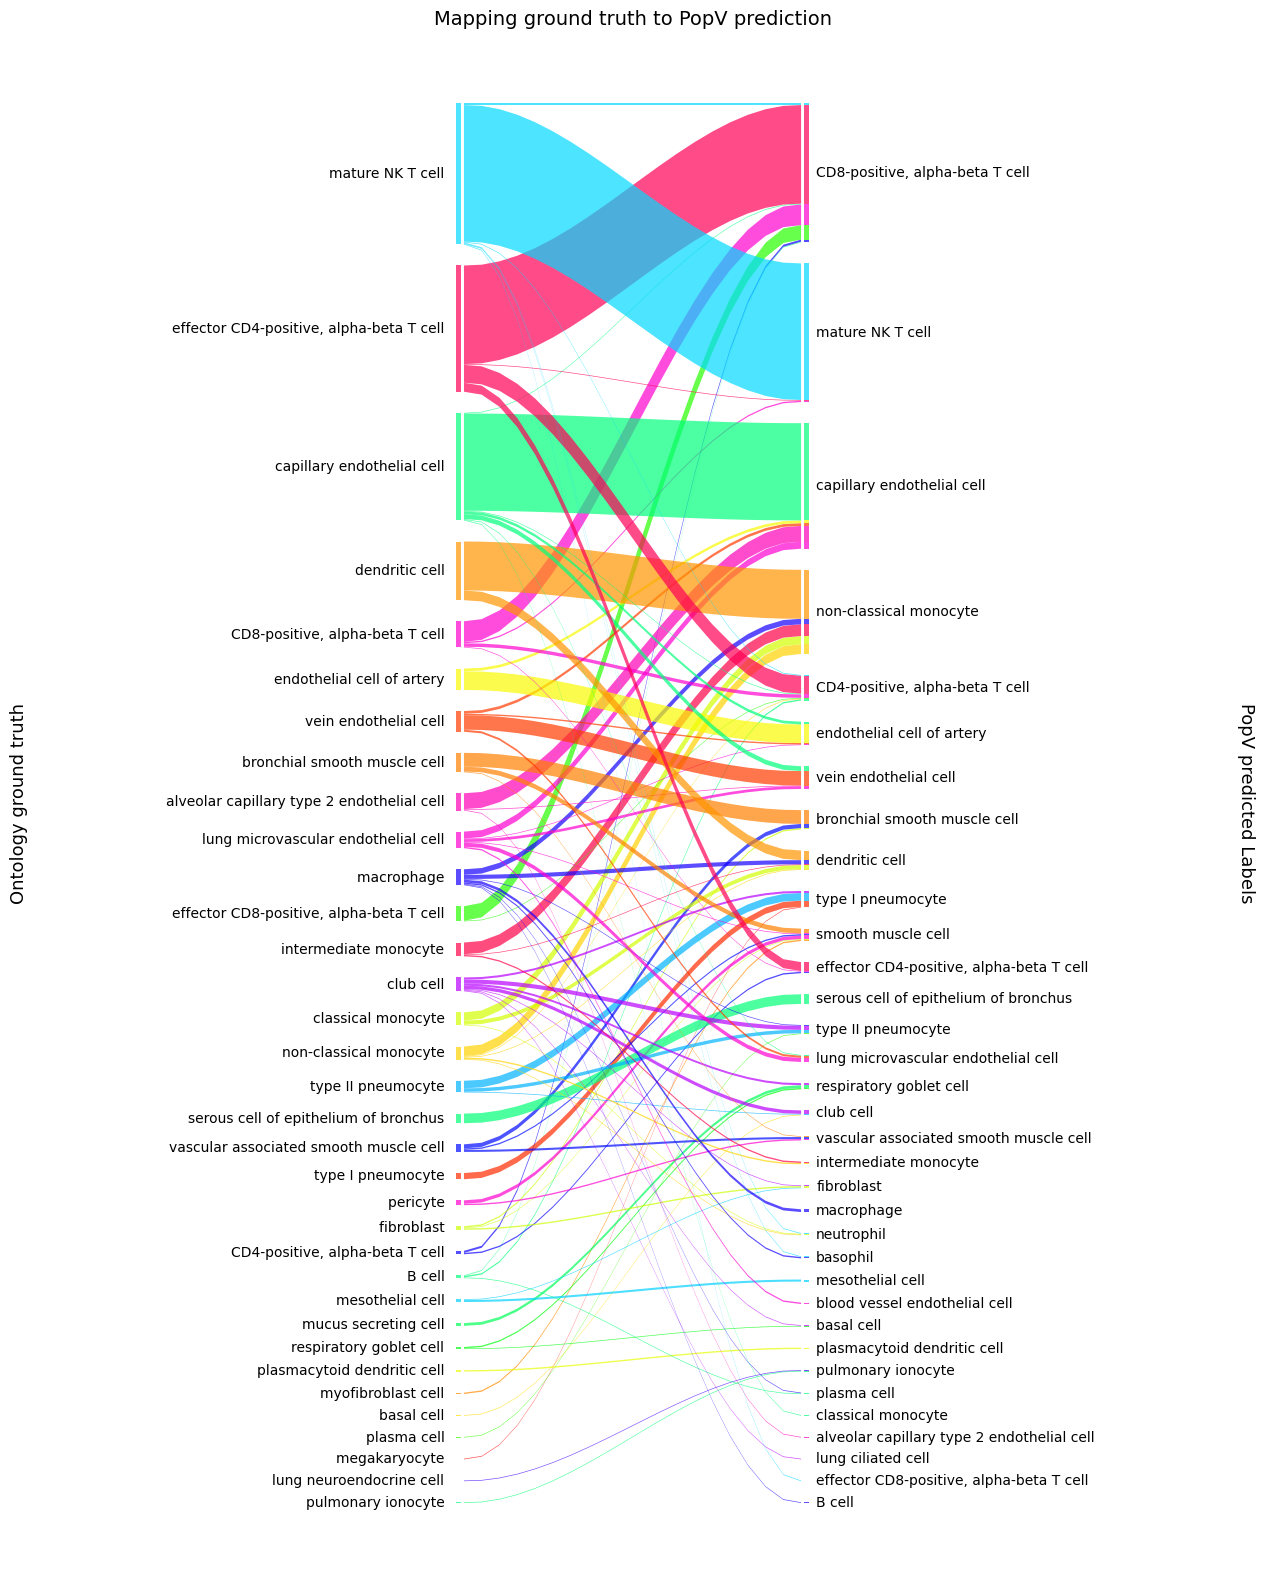

In [30]:
input_data = mismatch_ontology.obs[["cell_ontology_class", "popv_prediction"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Ontology ground truth", "PopV predicted Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping ground truth to PopV prediction', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig2/fig2_mismatch_majority_vote_popv.pdf", dpi=DPI, bbox_inches="tight")
plt.show()

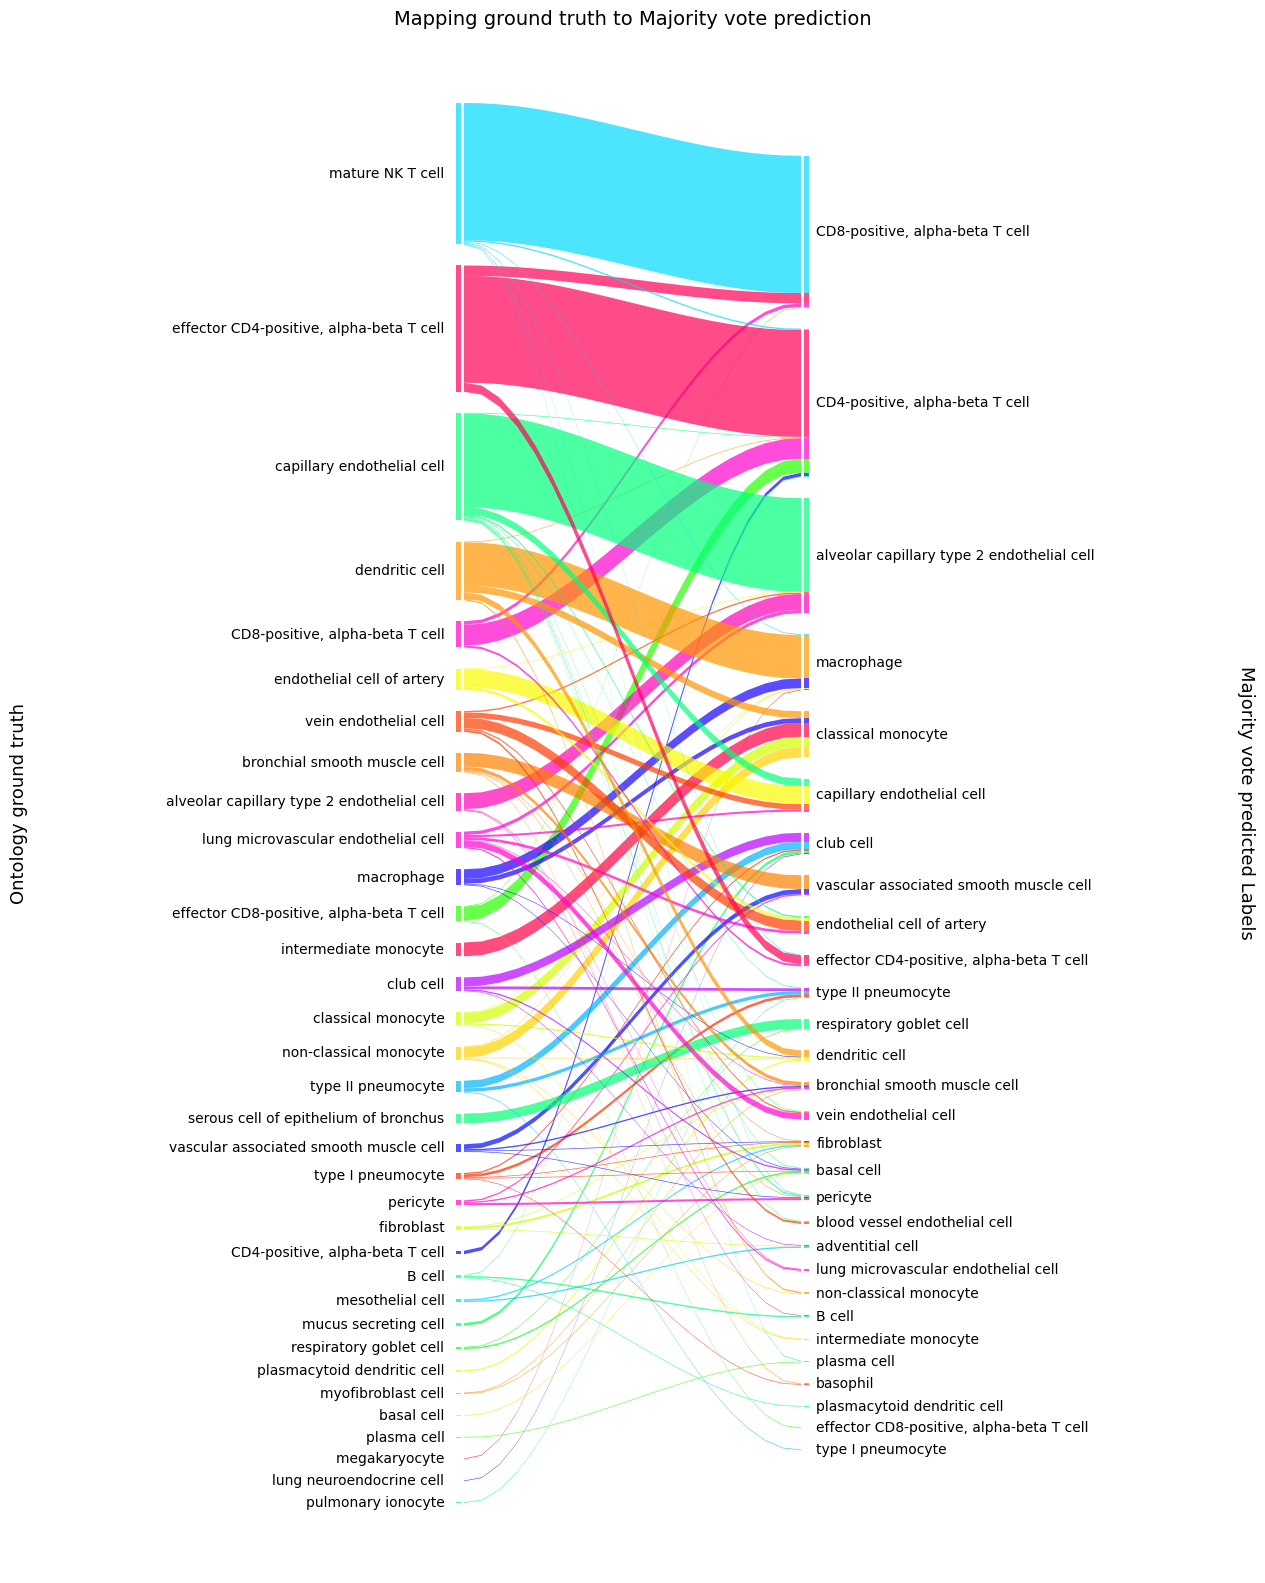

In [31]:
input_data = mismatch_ontology.obs[["cell_ontology_class", "popv_majority_vote_prediction"]].values.tolist()

ax = _alluvial.plot(
    input_data,
    alpha=0.7,
    color_side=0,
    rand_seed=1,
    figsize=(5, 20),
    fontname="Dejavu Sans",
    labels=("Ontology ground truth", "Majority vote predicted Labels"),
    label_shift=1,
    v_gap_frac=0.03
)
ax.set_title('Mapping ground truth to Majority vote prediction', fontsize=14, fontname='Dejavu Sans')
fig = plt.gcf()
fig.savefig("fig2/fig2_mismatch_majority_vote_majority.pdf", dpi=DPI, bbox_inches="tight")
plt.show()

In [11]:
from sklearn.metrics import f1_score, classification_report

In [12]:
mismatch_ontology = adata[adata.obs['popv_majority_vote_prediction'] != adata.obs['popv_prediction']].copy()

pred_keys = ['popv_majority_vote_prediction', 'popv_prediction']

In [13]:
mismatch_ontology.n_obs / adata.n_obs

0.014644651830581478

In [14]:
y_true = mismatch_ontology.obs['cell_ontology_class']
f1_df = pd.DataFrame(columns = ["micro"])

for key in pred_keys:
    y_pred = list(mismatch_ontology.obs[key])
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_micro = f1_score(y_true, y_pred, average='micro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    f1_df.loc[key] = [f1_micro]#, f1_micro,f1_weighted]

In [15]:
f1_df

,micro
popv_majority_vote_prediction,0.143137
popv_prediction,0.526471


In [17]:
f1_df.plot.bar?

Signature: f1_df.plot.bar(x=None, y=None, **kwargs) -> 'PlotAccessor'
Docstring:
Vertical bar plot.

A bar plot is a plot that presents categorical data with
rectangular bars with lengths proportional to the values that they
represent. A bar plot shows comparisons among discrete categories. One
axis of the plot shows the specific categories being compared, and the
other axis represents a measured value.

Parameters
----------
x : label or position, optional
    Allows plotting of one column versus another. If not specified,
    the index of the DataFrame is used.
y : label or position, optional
    Allows plotting of one column versus another. If not specified,
    all numerical columns are used.
color : str, array-like, or dict, optional
    The color for each of the DataFrame's columns. Possible values are:

    - A single color string referred to by name, RGB or RGBA code,
        for instance 'red' or '#a98d19'.

    - A sequence of color strings referred to by name, RGB or RGBA
  

In [ ]:
ax = f1_df.plot.barh(color='lightblue')

ax.set_ylabel('f1 Prediction Accuracy')
ax.set_title('Accuracy Per Method')

fig = plt.gcf()
fig.savefig("fig2/fig2_mismatch_majority_vote_f1_scores_horizontal.pdf", dpi=DPI, bbox_inches="tight")
plt.show()


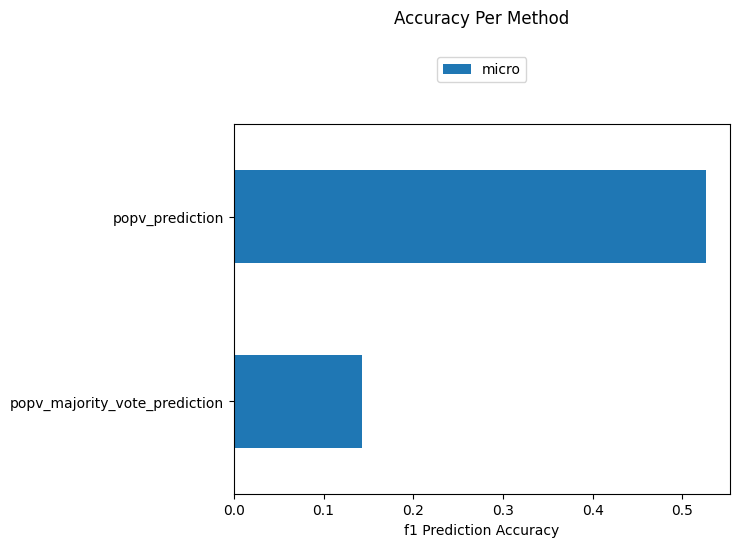

In [20]:
ax = f1_df.plot.barh()

ax.set_xlabel('f1 Prediction Accuracy')
ax.set_title('Accuracy Per Method', y=1.25)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=3)
fig = plt.gcf()
fig.savefig("fig2/fig2_mismatch_majority_vote_f1_scores.pdf", dpi=DPI, bbox_inches="tight")
plt.show()